# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence

Tilburg University Academic Year 2022-2023

Your First Name: Wafa

Your Last Name: Mohamed

Your Student ID: 2097778 

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

https://www.tutorialspoint.com/time-functions-in-python

# Packages

In [51]:
from skimage.util import random_noise, img_as_float
from skimage.transform import rescale

%matplotlib inline

from skimage import data, color

from skimage import feature
from skimage.util import img_as_ubyte
from skimage import util

from skimage.filters import threshold_local, threshold_otsu , try_all_threshold, rank,  median
from skimage import color

from skimage.filters import median 
import scipy.ndimage.filters
import numpy as np
from scipy import ndimage as ndi
import skimage.filters

from skimage import exposure
from skimage import io, color

import matplotlib.pyplot as plt

from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from scipy import signal

from time import time
import pandas as pd

## Part 1: Image smoothing in the spatial and frequency domain

1. (5 points) Read in the color image you have been provided.  Convert the image to grayscale. Display the image with a grayscale colormap and an appropriate title. 

Points breakdown: 3 points for converting the color image to gray, 2 points for displaying your image.

Text(0.5, 1.0, 'Grayscale image')

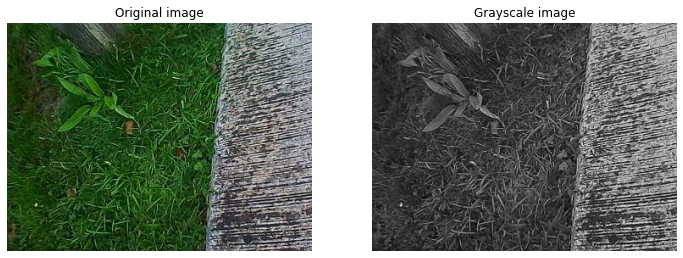

In [40]:
im = io.imread("2097778_rgbimage.jpg")
imSKgray = color.rgb2gray(im)

plt.figure(figsize = (12, 12))
plt.subplot(121)
plt.imshow(im, cmap = "gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(122)
plt.imshow(imSKgray, cmap = "gray")
plt.axis ("off")
plt.title("Grayscale image")

2. (5 points) Add 10\% salt and pepper noise to the grayscale image.

Text(0.5, 1.0, 'Noised image')

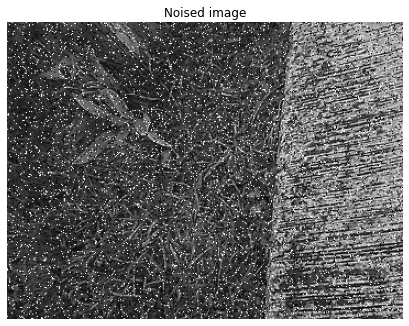

In [41]:
seed = 42
imSKgray_noisy = random_noise(imSKgray, seed = seed, mode = "s&p", amount = 0.1)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.imshow(imSKgray_noisy, cmap = "gray")
plt.axis("off")
plt.title("Noised image")


3. (5 points) Denoise the noisy image by performing a Gaussian blur with `sigma=1` in the spatial domain. Display your denoised image.  

Points breakdown: 3 points for denosing the image, 2 points for displaying your image.

Text(0.5, 1.0, 'Denoised image (Spatial Domain)')

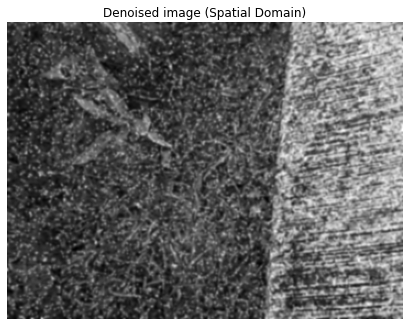

In [42]:
imGauss= scipy.ndimage.gaussian_filter(imSKgray_noisy, sigma = 1)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.imshow(imGauss, cmap = "gray")
plt.axis ("off")
plt.title("Denoised image (Spatial Domain)")

4. (5 points) Convert both the "clean" grayscale image (output of Q1.1) and noisy image (output of Q1.2) to the frequency domain and display the two FFT spectrums (FFT magnitude).

Points breakdown: 2 points for converting to the frequency domain, 3 point for displaying the FFT spectrum.

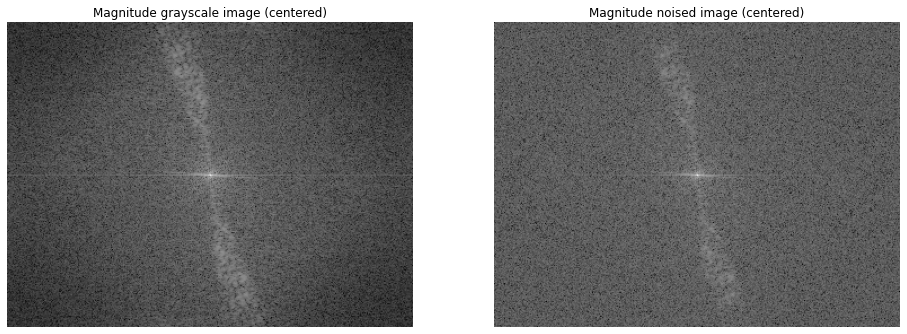

In [43]:
F_grayscale = fftn(imSKgray)
F_noisy_image = fftn(imSKgray_noisy)


S_grayscale = abs(F_grayscale)
S_noisy_image = abs(F_noisy_image)
Fc = fftshift(S_noisy_image) 
Fc1 = fftshift(S_grayscale)


plt.figure(figsize = (16, 16))
plt.subplot(121)
plt.title("Magnitude grayscale image (centered)")
plt.axis("off")
plt.imshow((np.log(1+Fc1)), cmap = "gray")

plt.subplot(122)
plt.title("Magnitude noised image (centered)")
plt.axis("off")
plt.imshow((np.log(1+Fc)), cmap = "gray")


5. (5 points) Denoise the noisy image in frequency space by performing a Gaussian blur with `sigma=1` in the frequency domain. Convert your denoised solution back to the spatial domain. Display your denoised image. 

Points breakdown: 2 points for denoising. 2 points for converting your solution to the spatial domain,
1 point for displaying the image.

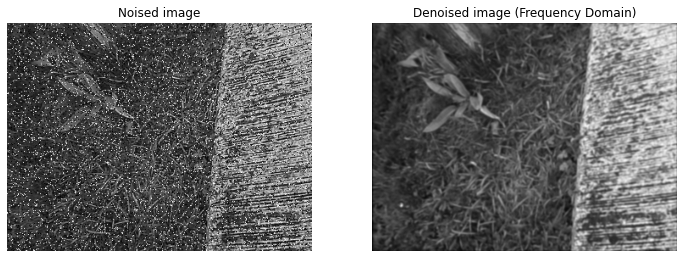

In [44]:
seed = 42
F_noisy_image = fftn(imSKgray_noisy)

gauss_kernel = np.outer(signal.gaussian(F_noisy_image.shape[0], 1), signal.gaussian(F_noisy_image.shape[1],1))
im_blurred2 = signal.fftconvolve(imSKgray, gauss_kernel, mode = 'same')


plt.figure(figsize =  (12, 12))
plt.subplot(121)
plt.axis("off")
plt.title("Noised image")
plt.imshow(imSKgray_noisy, cmap = "gray")

plt.subplot(122)
plt.axis("off")
plt.title("Denoised image (Frequency Domain)")
plt.imshow(im_blurred2, cmap = "gray")


6. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain for the following 6 values of `sigma` - 1,2,4,16,32,64 and 128. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. 

Points breakdown: 3 points for running the operations in the spatial domain. 3 points for running
the operations in the frequency domain. 1 point for the plot.

   Sigma  Frequency D  Spatial Domain
0      1    12.554884        0.998020
1      2    15.685320        0.995636
2      4    15.628338        1.992941
3     16    15.622139        8.088112
4     32    15.630960       17.712355
5     64    15.613794       47.397375
6    128    16.145468       97.347736


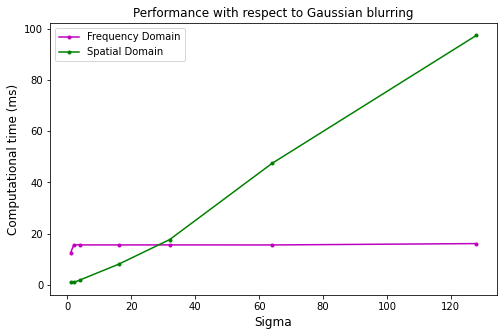

In [50]:
sp_1, sp_2,sp_4,sp_16,sp_32,sp_64,sp_128 =  [], [],[],[],[],[],[]
fd_1, fd_2, fd_4, fd_16,fd_32,fd_64,fd_128 =  [], [],[],[],[],[],[]

def TimeSpatio (sigma): 
    start = time()
    scipy.ndimage.gaussian_filter(imSKgray_noisy, sigma)
    end = time()
    return (end - start)  * 1000 # time in miliseconds

def TimeFrequency (sigma): 
    start = time()
    np.outer(signal.gaussian(F_noisy_image.shape[0], sigma), signal.gaussian(F_noisy_image.shape[1],sigma))
    signal.fftconvolve(imSKgray, gauss_kernel, mode = 'same')
    end = time()
    return (end - start)  * 1000 # time in miliseconds


sp_1.append(TimeSpatio(1)), sp_2.append(TimeSpatio(2)),sp_4.append(TimeSpatio(4)),sp_16.append(TimeSpatio(16)), 
sp_32.append(TimeSpatio(32)), sp_64.append(TimeSpatio(64)), sp_128.append(TimeSpatio(128))


fd_1.append(TimeFrequency(1)), fd_2.append(TimeFrequency(2)),fd_4.append(TimeFrequency(4)),fd_16.append(TimeFrequency(16)), 
fd_32.append(TimeFrequency(32)), fd_64.append(TimeFrequency(64)), fd_128.append(TimeFrequency(128))

manual_data = pd.DataFrame({"Sigma": [1, 2, 4,16, 32, 64, 128],
                "Frequency D": [fd_1[0], fd_2[0],fd_4[0],fd_16[0], fd_32[0], fd_64[0], fd_128[0]], 
                "Spatial Domain": [sp_1[0], sp_2[0],sp_4[0],sp_16[0], sp_32[0], sp_64[0], sp_128[0]]})

plt.figure(figsize = (8, 5)), plt.subplot(111)
plt.plot(manual_data["Sigma"], manual_data["Frequency D"], color = "m", label = "Frequency Domain", marker = ".")
plt.plot(manual_data["Sigma"], manual_data["Spatial Domain"], color = "g", label = "Spatial Domain", marker = ".")
plt.xlabel("Sigma", fontsize = 12), plt.ylabel("Computational time (ms)", fontsize = 12)
plt.title("Performance with respect to Gaussian blurring"), plt.legend()

print(manual_data)

Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

Points breakdown: 2 points for your comment on the plot and answering the question.

The graph above shows that if you increase the sigma, the computational time of the spatial domain (kernel) increases exponentially, whereas the computational time that is needed for the frequency domain increases slowly. So if the kernel is small the Spatial kernel/domain is faster, and thus preferred, and Frequency kernel/domain is preferred when the kernel/sigma gets larger. 
